In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
# Replace 'path_to_file.csv' with the actual path to your CSV file
file_path = "liver_patient_dataset.csv"
data = pd.read_csv(file_path, encoding = "latin1")


In [6]:
# Display first few rows
data.head()


,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [7]:
# Check for null values in the dataset
print("Missing Values Per Column:")
print(data.isnull().sum())


Missing Values Per Column:
Age of the patient                        1
Gender of the patient                   108
Total Bilirubin                          31
Direct Bilirubin                         54
 Alkphos Alkaline Phosphotase            79
 Sgpt Alamine Aminotransferase           68
Sgot Aspartate Aminotransferase          34
Total Protiens                           48
 ALB Albumin                             37
A/G Ratio Albumin and Globulin Ratio     43
Result                                    0
dtype: int64


In [8]:
data.describe()

,Age of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
count,2999.000000,2969.000000,2946.000000,2921.000000,2932.000000,2966.000000,2952.000000,2963.000000,2957.000000,3000.000000
mean,44.293098,3.229404,1.462016,289.475522,82.517394,111.316588,6.479201,3.135268,0.945810,1.285667
std,15.966603,5.985714,2.769227,238.050435,187.847523,288.258203,1.084936,0.792641,0.318648,0.451807
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.920000,1.000000
75%,55.000000,2.600000,1.300000,298.000000,61.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [9]:
# Fill missing gender with the mode
gender_mode = data['Gender of the patient'].mode()[0]
data['Gender of the patient'].fillna(gender_mode, inplace=True)


In [10]:
# Fill missing numeric columns with the mean
numeric_cols = [
    'Age of the patient', 'Total Bilirubin', 'Direct Bilirubin',
    ' Alkphos Alkaline Phosphotase', ' Sgpt Alamine Aminotransferase',
    'Sgot Aspartate Aminotransferase', 'Total Protiens',
    ' ALB Albumin', 'A/G Ratio Albumin and Globulin Ratio'
]

for col in numeric_cols:
    data[col].fillna(data[col].mean(), inplace=True)


KeyError: ' Alkphos Alkaline Phosphotase'

In [11]:
# Standardize column names
data.columns = data.columns.str.strip().str.replace(' ', '_')


In [12]:
print(data.columns)


Index(['Age_of_the_patient', 'Gender_of_the_patient', 'Total_Bilirubin',
       'Direct_Bilirubin', 'Alkphos_Alkaline_Phosphotase',
       'Sgpt_Alamine_Aminotransferase', 'Sgot_Aspartate_Aminotransferase',
       'Total_Protiens', 'ALB_Albumin', 'A/G_Ratio_Albumin_and_Globulin_Ratio',
       'Result'],
      dtype='object')


In [13]:
# List updated column names
numeric_cols = [
    'Age_of_the_patient', 'Total_Bilirubin', 'Direct_Bilirubin',
    'Alkphos_Alkaline_Phosphotase', 'Sgpt_Alamine_Aminotransferase',
    'Sgot_Aspartate_Aminotransferase', 'Total_Protiens',
    'ALB_Albumin', 'A/G_Ratio_Albumin_and_Globulin_Ratio'
]

# Impute missing values with the mean
for col in numeric_cols:
    data[col].fillna(data[col].mean(), inplace=True)


In [14]:
print("Missing Values After Imputation:")
print(data.isnull().sum())


Missing Values After Imputation:
Age_of_the_patient                      0
Gender_of_the_patient                   0
Total_Bilirubin                         0
Direct_Bilirubin                        0
Alkphos_Alkaline_Phosphotase            0
Sgpt_Alamine_Aminotransferase           0
Sgot_Aspartate_Aminotransferase         0
Total_Protiens                          0
ALB_Albumin                             0
A/G_Ratio_Albumin_and_Globulin_Ratio    0
Result                                  0
dtype: int64


In [15]:
# Check for duplicates
duplicates = data.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

# Drop duplicates if found
data = data.drop_duplicates()
print(f"Data shape after removing duplicates: {data.shape}")


Number of duplicate rows: 346
Data shape after removing duplicates: (2654, 11)


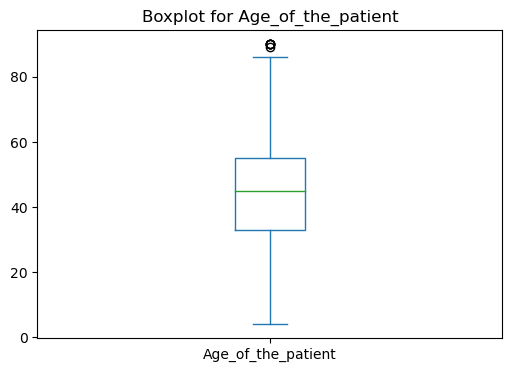

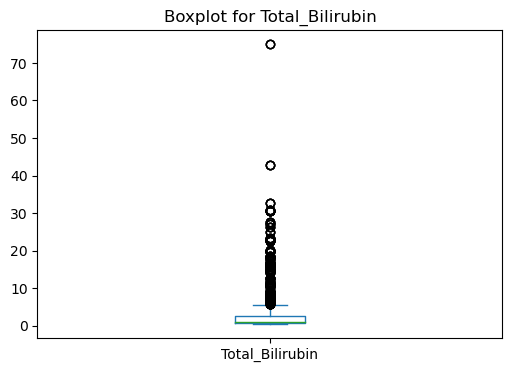

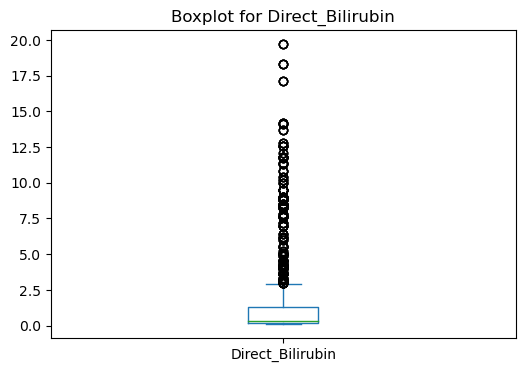

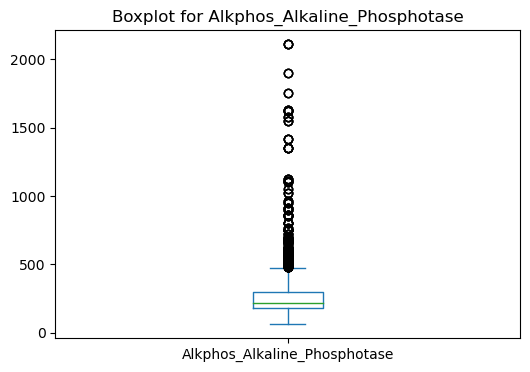

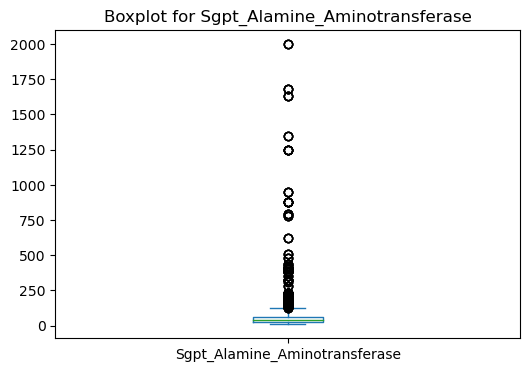

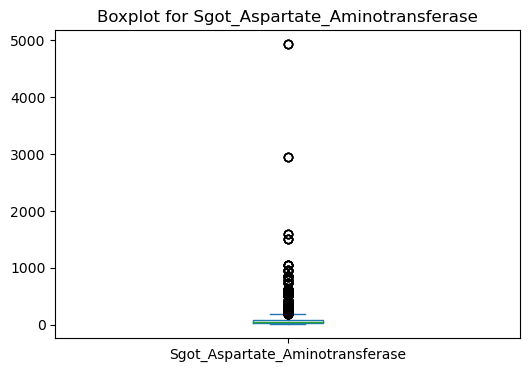

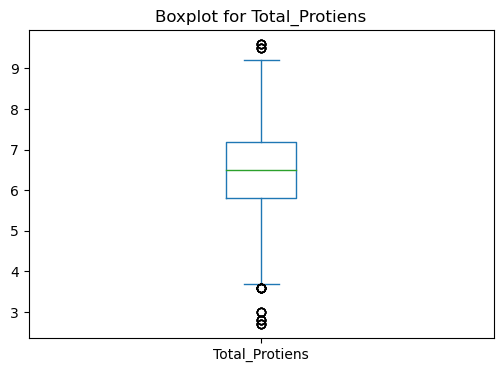

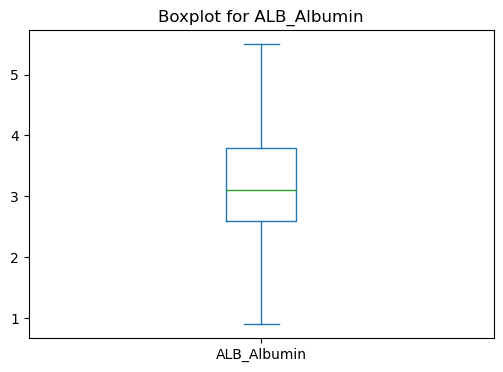

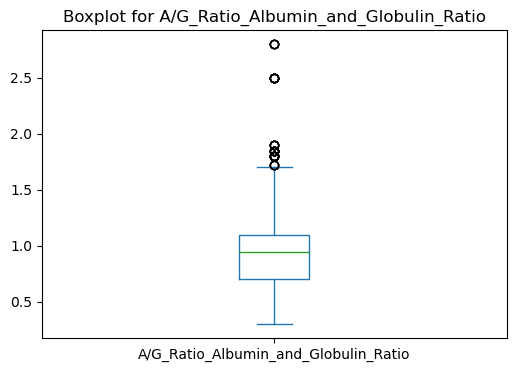

In [16]:
import matplotlib.pyplot as plt

# Visualize outliers for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    data[col].plot(kind='box')
    plt.title(f"Boxplot for {col}")
    plt.show()


In [17]:
# Remove outliers using IQR
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

print(f"Data shape after outlier removal: {data.shape}")


Data shape after outlier removal: (1602, 11)


In [18]:
# Check unique values in the categorical column
print(data['Gender_of_the_patient'].unique())


['Female' 'Male']


In [19]:
# Apply one-hot encoding to 'Gender_of_the_patient'
data = pd.get_dummies(data, columns=['Gender_of_the_patient'], drop_first=True)


In [20]:
# Check the updated dataset
print(data.head())


   Age_of_the_patient  Total_Bilirubin  Direct_Bilirubin  \
0                65.0              0.7               0.1   
3                58.0              1.0               0.4   
5                46.0              1.8               0.7   
6                26.0              0.9               0.2   
7                29.0              0.9               0.3   

   Alkphos_Alkaline_Phosphotase  Sgpt_Alamine_Aminotransferase  \
0                         187.0                      16.000000   
3                         182.0                      14.000000   
5                         208.0                      19.000000   
6                         154.0                      82.517394   
7                         202.0                      14.000000   

   Sgot_Aspartate_Aminotransferase  Total_Protiens  ALB_Albumin  \
0                             18.0             6.8          3.3   
3                             20.0             6.8          3.4   
5                             14.0       

In [21]:
# Convert boolean to integer (0 and 1)
data['Gender_of_the_patient_Male'] = data['Gender_of_the_patient_Male'].astype(int)

# Verify the updated column
print(data[['Gender_of_the_patient_Male']].head())


   Gender_of_the_patient_Male
0                           0
3                           1
5                           1
6                           0
7                           0


In [22]:
# Generalize Age into age ranges
bins = [0, 20, 40, 60, 80, 100]  # Define bins
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']  # Define labels
data['Age_Range'] = pd.cut(data['Age_of_the_patient'], bins=bins, labels=labels)

# Drop the original age column for k-anonymity
data.drop(columns=['Age_of_the_patient'], inplace=True)


In [23]:
# Group by quasi-identifiers
k_anonymity_check = data.groupby(['Age_Range', 'Gender_of_the_patient_Male']).size()

# Print equivalence class sizes
print(k_anonymity_check)


Age_Range  Gender_of_the_patient_Male
0-20       0                              24
           1                              77
21-40      0                             136
           1                             406
41-60      0                             205
           1                             479
61-80      0                              51
           1                             221
81-100     0                               3
           1                               0
dtype: int64


In [24]:
# Example: Enforce k-anonymity by suppressing sensitive records
k = 5  # Set desired k value
anonymized_data = data.groupby(['Age_Range', 'Gender_of_the_patient_Male']).filter(lambda x: len(x) >= k)

# Print the shape of the anonymized dataset
print(f"Data shape after enforcing k-anonymity: {anonymized_data.shape}")


Data shape after enforcing k-anonymity: (1599, 11)


In [25]:
# Group by QIs and calculate diversity
l_diversity_check = anonymized_data.groupby(['Age_Range', 'Gender_of_the_patient_Male'])['Result'].nunique()

# Print l-diversity results
print(l_diversity_check)


Age_Range  Gender_of_the_patient_Male
0-20       0                             2
           1                             2
21-40      0                             2
           1                             2
41-60      0                             2
           1                             2
61-80      0                             2
           1                             2
81-100     0                             0
           1                             0
Name: Result, dtype: int64


In [26]:
# Set desired l value
l = 2  # At least 2 distinct 'Result' values per group

# Enforce l-diversity
l_diverse_data = anonymized_data.groupby(['Age_Range', 'Gender_of_the_patient_Male']).filter(
    lambda x: x['Result'].nunique() >= l
)

# Print the shape of the l-diverse dataset
print(f"Data shape after enforcing l-diversity: {l_diverse_data.shape}")


Data shape after enforcing l-diversity: (1599, 11)


In [27]:
# Verify l-diversity condition
l_diversity_verification = l_diverse_data.groupby(['Age_Range', 'Gender_of_the_patient_Male'])['Result'].nunique()
print(l_diversity_verification)


Age_Range  Gender_of_the_patient_Male
0-20       0                             2
           1                             2
21-40      0                             2
           1                             2
41-60      0                             2
           1                             2
61-80      0                             2
           1                             2
81-100     0                             0
           1                             0
Name: Result, dtype: int64


In [28]:
import numpy as np

# Define epsilon (privacy budget)
epsilon = 1.0  # Smaller values offer stronger privacy

# Add Laplace noise to the sensitive attribute
sensitivity = 1  # Sensitivity of the 'Result' column
noise = np.random.laplace(loc=0, scale=sensitivity/epsilon, size=l_diverse_data['Result'].shape)

# Apply the noise
l_diverse_data['Noisy_Result'] = l_diverse_data['Result'] + noise


In [29]:
# Inspect the noisy sensitive attribute
print(l_diverse_data[['Result', 'Noisy_Result']].head())


   Result  Noisy_Result
0       1     -0.101038
3       1      1.451643
5       1      1.032946
6       1      1.055755
7       1      1.622776


In [30]:
# Compare statistics before and after noise addition
print("Original Result Statistics:")
print(l_diverse_data['Result'].describe())

print("Noisy Result Statistics:")
print(l_diverse_data['Noisy_Result'].describe())


Original Result Statistics:
count    1599.000000
mean        1.394622
std         0.488922
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: Result, dtype: float64
Noisy Result Statistics:
count    1599.000000
mean        1.351615
std         1.471278
min        -5.311603
25%         0.565460
50%         1.339993
75%         2.143624
max         9.025629
Name: Noisy_Result, dtype: float64


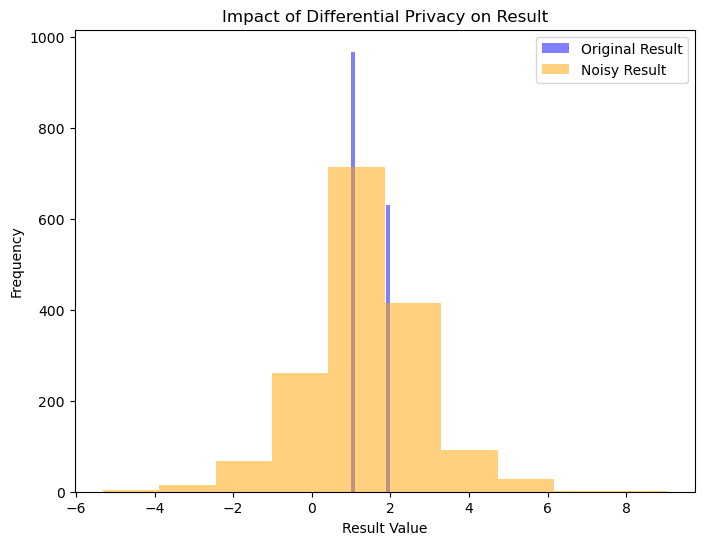

In [31]:
import matplotlib.pyplot as plt

# Plot distributions
plt.figure(figsize=(8, 6))
plt.hist(l_diverse_data['Result'], bins=10, alpha=0.5, label='Original Result', color='blue')
plt.hist(l_diverse_data['Noisy_Result'], bins=10, alpha=0.5, label='Noisy Result', color='orange')
plt.legend()
plt.title('Impact of Differential Privacy on Result')
plt.xlabel('Result Value')
plt.ylabel('Frequency')
plt.show()


In [32]:
# Correlation analysis
correlation = l_diverse_data[['Result', 'Noisy_Result']].corr().iloc[0, 1]
print(f"Correlation between Result and Noisy_Result: {correlation:.2f}")


Correlation between Result and Noisy_Result: 0.35


In [33]:
# Bound noisy values to [1, 2]
l_diverse_data['Bounded_Noisy_Result'] = l_diverse_data['Noisy_Result'].clip(lower=1, upper=2)
print(l_diverse_data[['Result', 'Bounded_Noisy_Result']].head())


   Result  Bounded_Noisy_Result
0       1              1.000000
3       1              1.451643
5       1              1.032946
6       1              1.055755
7       1              1.622776


In [34]:
# Retain only required columns
final_data = l_diverse_data.drop(columns=['Noisy_Result'])


In [35]:
final_data.rename(columns={'Bounded_Noisy_Result': 'Protected_Result'}, inplace=True)


In [36]:
# Save the final dataset to CSV
final_data.to_csv('processed_dataset.csv', index=False)
print("Processed dataset saved as 'processed_dataset.csv'")


Processed dataset saved as 'processed_dataset.csv'


In [37]:
pip install flask


Note: you may need to restart the kernel to use updated packages.
